<a href="https://colab.research.google.com/github/SoA-Lee/Moon-Study/blob/master/BreamAmdSmeltTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight)) #전달받은 리스트를 일렬로 세움.(2줄)
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #첫번째 차원(1차원)을 따라 배열 연결

from sklearn.model_selection import train_test_split #전달되는 리스트나 배열을 비율에 맞게 훈련세트와 테스트 세트로 나누어줌.(섞어줌)
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state =42)
print(train_input.shape, test_input.shape)

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state =42) 
#13개의 테스트 세트 중에 10개의 도미, 3개의 빙어()3.3:1, 실제(도미 35, 빙어 14, 2,5:1)
#stratify 매개변수에 타깃 데이터를 전달하면 비율에 맞게 데이터 나눔.
print(test_target) #빙어가 하나 늘어(2.25:1)

(36, 2) (13, 2)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

print(kn.predict([[25,150]])) #도미로 나와야하는데 빙어가 나옴.

[0.]


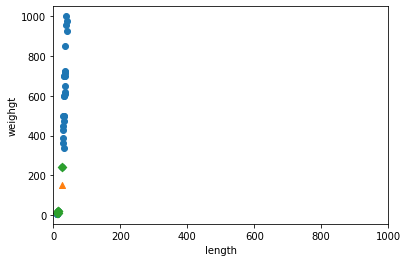

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1]) #[행,렬]
plt.scatter(25,150,marker='^') #매개변수 모양 지정
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D") #마름모 표현, 가까운 5개.
plt.xlim((0,1000)) #x축 범위를 동일하게 0~1000으로 설정
plt.xlabel('length')
plt.ylabel('weighgt')
plt.show()

print(train_input[indexes])
print(train_target[indexes])
print(distances) #거리 출력력

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


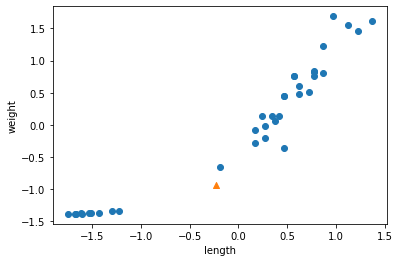

In [ ]:
mean = np.mean(train_input, axis=0) #평균 계산
std = np.std(train_input, axis = 0) #표준편차
print(mean, std)
train_scaled = (train_input-mean) /std #브로드캐스팅

new = ([25,150]-mean)/std


plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled, test_target)
print(kn.predict([new])

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1]) #[행,렬]
plt.scatter(new[0], new[1],marker="^")
ple.scatter(train_scaled[indexes,0], train_scaled[indexex,1],marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

SyntaxError: ignored